In [164]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [166]:
lead=pd.read_csv('/content/Leads_TimeSeries_Oye!.csv',date_parser=dateparse)

In [167]:
lead

,date,lead_source,count
0,2020-06-01,CBOB,1
1,2020-06-01,Driver App installation,16
2,2020-06-01,Driver Referral,29
3,2020-06-01,Operator app,12
4,2020-06-02,Driver App installation,26
...,...,...,...
1301,2021-04-30,Driver App installation,5
1302,2021-04-30,Driver Referral,1
1303,2021-05-01,Driver App installation,11
1304,2021-05-01,Driver Referral,3


**CONSIDERED DATA FROM 1/6/20-15/4/21**

In [168]:
lead=lead[(lead['date']>='2020-06-01') & (lead['date']<='2021-04-15')]

In [169]:
lead.drop('lead_source',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [170]:
lead.describe()

,count
count,1255.000000
mean,19.980080
std,23.629357
min,1.000000
25%,5.000000
50%,14.000000
75%,28.000000
max,360.000000


In [171]:
lead=lead.groupby('date').sum()['count'].reset_index()


In [172]:
lead.head(20)

,date,count
0,2020-06-01,58
1,2020-06-02,57
2,2020-06-03,66
3,2020-06-04,69
4,2020-06-05,67
5,2020-06-06,87
6,2020-06-07,39
7,2020-06-08,78
8,2020-06-09,57
9,2020-06-10,57


In [173]:
lead.tail(20)

,date,count
299,2021-03-27,64
300,2021-03-28,16
301,2021-03-29,49
302,2021-03-30,60
303,2021-03-31,39
304,2021-04-01,19
305,2021-04-02,26
306,2021-04-03,49
307,2021-04-04,19
308,2021-04-05,77


In [174]:
lead.describe()

,count
count,319.000000
mean,78.605016
std,50.908051
min,6.000000
25%,44.500000
50%,66.000000
75%,95.000000
max,396.000000


In [175]:
lead.to_csv('LeadData.csv')

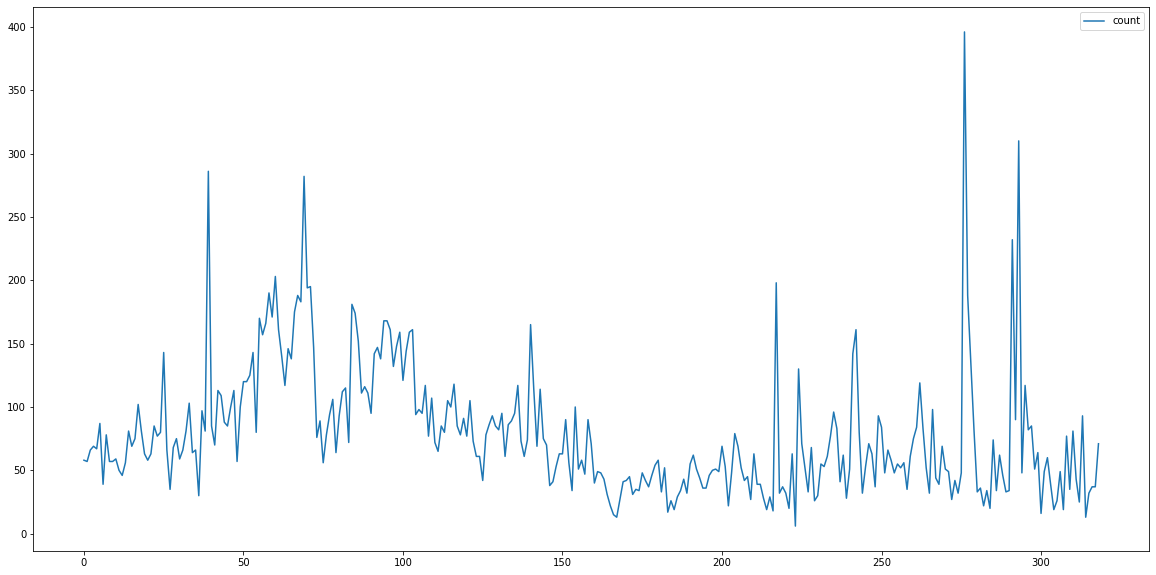

In [176]:
lead.plot(figsize=(20,10))

In [177]:
lead['date']=pd.to_datetime(lead['date'])

In [178]:
lead.set_index('date',inplace=True)

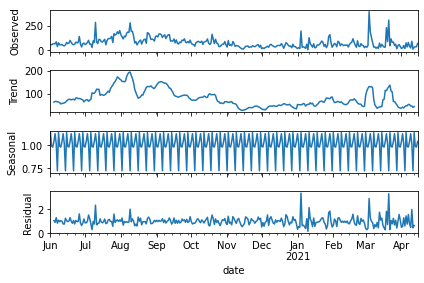

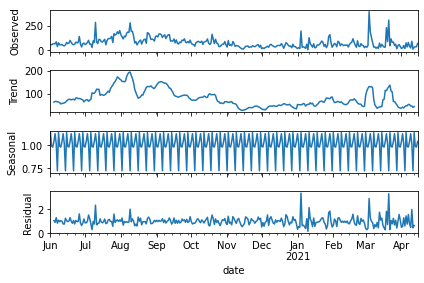

In [179]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(lead, model='multiplicative')
result.plot()

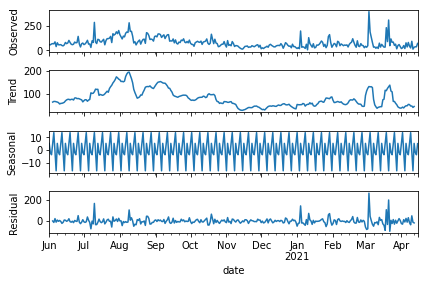

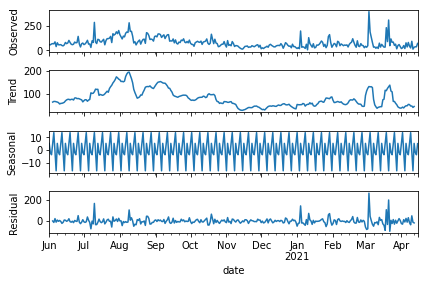

In [180]:
result = seasonal_decompose(lead, model='additive')
result.plot()

**Augmented Dickey Fuller Test**

```
Hypothesis Testing
H0: Non Stationary Data
H1: Stationary Data
5% Level of Significance
```




In [181]:
from statsmodels.tsa.stattools import adfuller

In [182]:
res=adfuller(lead['count'])

In [183]:
def adfuller_test(count):
  result=adfuller(count)
  labels=['ADF Test Statistic','p value','Number of Lags Used','Number of Observations used']
  for i,label in zip(result,labels):
    print(label+':'+str(i))

     
  if result[1]<=0.05:
     print("Reject Null Hypothesis")
  else:
    print("Accept Null Hypothesis")

In [184]:
adfuller_test(lead['count'])

ADF Test Statistic:-1.5762332234654095
p value:0.49552037232386753
Number of Lags Used:17
Number of Observations used:301
Accept Null Hypothesis


**Differenciation**

```
Non Stationary -> Stationary
```



In [185]:
lead['Lead Count']=lead['count']-lead['count'].shift(1)

In [186]:
lead

,count,Lead Count
date,,
2020-06-01,58,NaN
2020-06-02,57,-1.0
2020-06-03,66,9.0
2020-06-04,69,3.0
2020-06-05,67,-2.0
...,...,...
2021-04-11,13,-80.0
2021-04-12,32,19.0
2021-04-13,37,5.0


In [187]:
lead['count'].values

array([ 58,  57,  66,  69,  67,  87,  39,  78,  57,  57,  59,  50,  46,
        56,  81,  69,  75, 102,  81,  63,  58,  63,  85,  77,  80, 143,
        66,  35,  68,  75,  59,  66,  81, 103,  64,  66,  30,  97,  81,
       286,  85,  70, 113, 109,  88,  85, 100, 113,  57, 100, 120, 120,
       125, 143,  80, 170, 157, 166, 190, 171, 203, 161, 140, 117, 146,
       138, 175, 188, 183, 282, 194, 195, 147,  76,  89,  56,  78,  94,
       106,  64,  93, 112, 115,  72, 181, 174, 152, 111, 116, 111,  95,
       142, 147, 138, 168, 168, 161, 132, 148, 159, 121, 144, 159, 161,
        94,  98,  95, 117,  77, 107,  72,  65,  85,  80, 105, 100, 118,
        85,  78,  91,  77, 105,  73,  61,  61,  42,  78,  86,  93,  85,
        82,  95,  61,  86,  89,  95, 117,  73,  61,  74, 165, 114,  69,
       114,  75,  70,  38,  41,  53,  63,  63,  90,  56,  34, 100,  51,
        58,  47,  90,  71,  40,  49,  48,  43,  31,  22,  15,  13,  27,
        41,  42,  45,  31,  35,  34,  48,  42,  37,  46,  54,  5

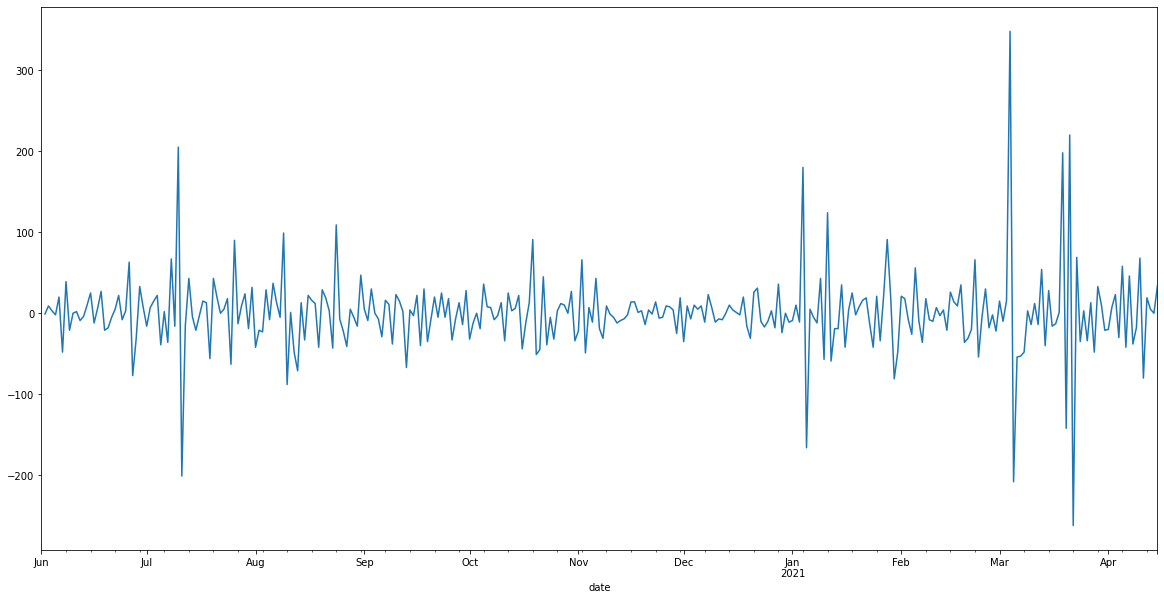

In [188]:
lead['Lead Count'].plot(figsize=(20,10))

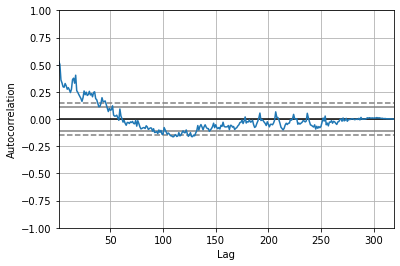

In [189]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(lead['count'])

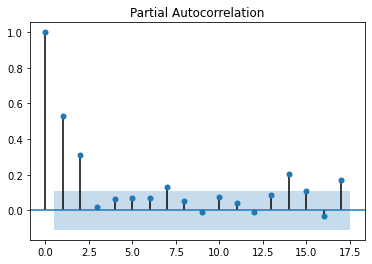

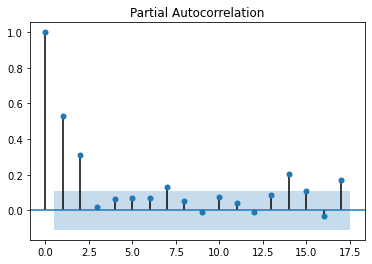

In [190]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lead['count'],lags=17)

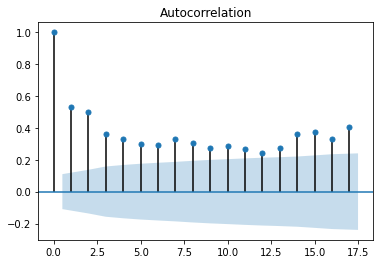

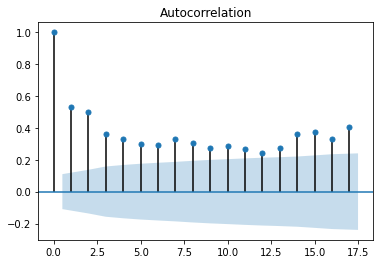

In [191]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(lead['count'],lags=17)

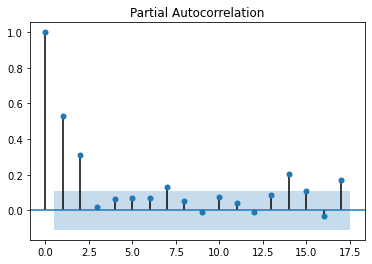

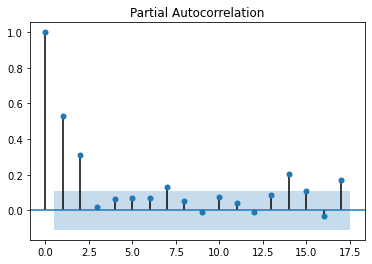

In [192]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lead['count'],lags=17)

**ARIMA MODEL (P=2,D=1,Q=2)**

In [193]:
from statsmodels.tsa.arima_model import ARIMA

In [194]:
model=ARIMA(lead['count'],order=(2,1,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [195]:
model_fit=model.fit()

In [196]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  318
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1627.210
Method:                       css-mle   S.D. of innovations             40.292
Date:                Sun, 06 Jun 2021   AIC                           3266.419
Time:                        13:45:46   BIC                           3288.991
Sample:                    06-02-2020   HQIC                          3275.435
                         - 04-15-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0452      0.289     -0.156      0.876      -0.613       0.522
ar.L1.D.count    -0.0243      0.227     -0.107      0.915      -0.470       0.422
ar.L2.D.count     0.2665      0.075      3.545      0.000       0.119       0.414
ma.L1.D.count    -0.6559      0.232     -2.830      0.005      -1.110      -0.202
ma.L2.D.count    -0.2507      0.208     -1.207      0.228      -0.658       0.156
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8920           +0.0000j            1.8920            0.5000
AR.2            1.9830           +0.0000j            1.9830            0.0000
MA.1            1.0794           +0.0000j            1.0794            0.0000
MA.2           -3.6957           +0.0000j            3.6957            0.5000
-----------------------------------------------------------------------------
"""

**PREDICTING FROM 16/4/21-30/7/21**

In [197]:
future=pd.date_range(start='2021-04-16',end='2021-07-30')

In [198]:
p=model_fit.predict(start=len(lead) ,end=len(lead)+105,typ='levels')

In [199]:
p.index=future

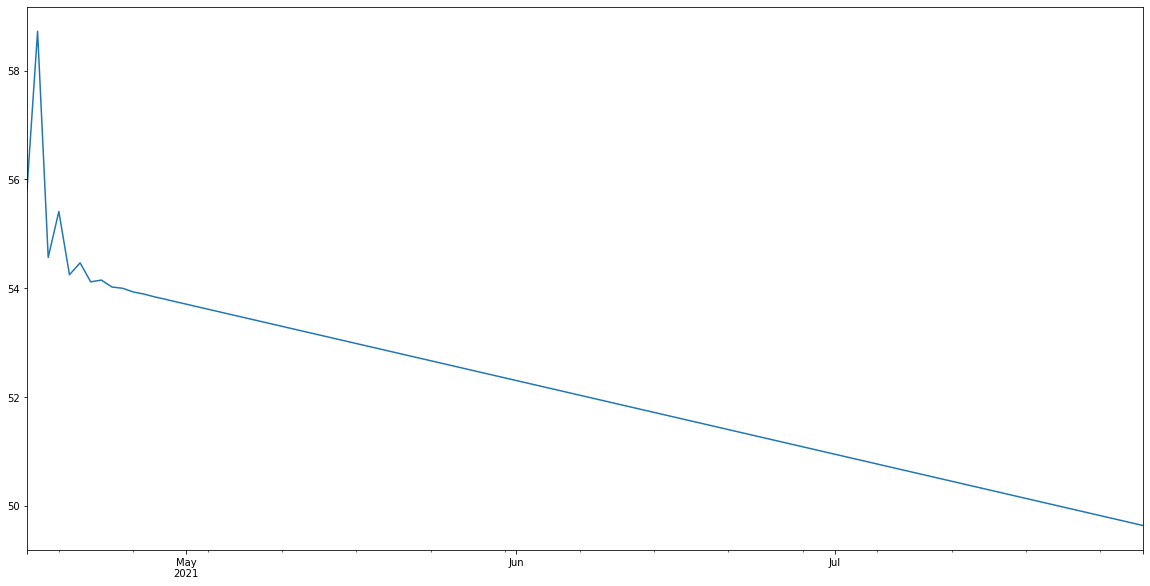

In [200]:
p.plot(figsize=(20,10))

In [201]:
p.values

array([55.80320869, 58.72094387, 54.56543325, 55.40965909, 54.2473512 ,
       54.4663217 , 54.11697836, 54.14957987, 54.02144188, 53.99900465,
       53.93116098, 53.89259169, 53.84120994, 53.79794163, 53.75106156,
       53.70643161, 53.66078443, 53.61576167, 53.57045262, 53.52531695,
       53.48010077, 53.43493276, 53.38974211, 53.34456486, 53.29938124,
       53.25420135, 53.20901968, 53.16383904, 53.1186579 , 53.07347705,
       53.02829606, 52.98311515, 52.93793419, 52.89275327, 52.84757233,
       52.80239139, 52.75721046, 52.71202952, 52.66684858, 52.62166765,
       52.57648671, 52.53130578, 52.48612484, 52.44094391, 52.39576297,
       52.35058204, 52.3054011 , 52.26022016, 52.21503923, 52.16985829,
       52.12467736, 52.07949642, 52.03431549, 51.98913455, 51.94395362,
       51.89877268, 51.85359174, 51.80841081, 51.76322987, 51.71804894,
       51.672868  , 51.62768707, 51.58250613, 51.5373252 , 51.49214426,
       51.44696333, 51.40178239, 51.35660145, 51.31142052, 51.26

In [202]:
predicted=pd.DataFrame(p)

In [203]:
predicted.columns=['Target Leads']


In [204]:
predicted

,Target Leads
2021-04-16,55.803209
2021-04-17,58.720944
2021-04-18,54.565433
2021-04-19,55.409659
2021-04-20,54.247351
...,...
2021-07-26,49.820450
2021-07-27,49.775269
2021-07-28,49.730088
2021-07-29,49.684907


In [205]:
predicted.to_csv('Predicted_Jun_Apr.csv')